[*********************100%***********************]  1 of 1 completed


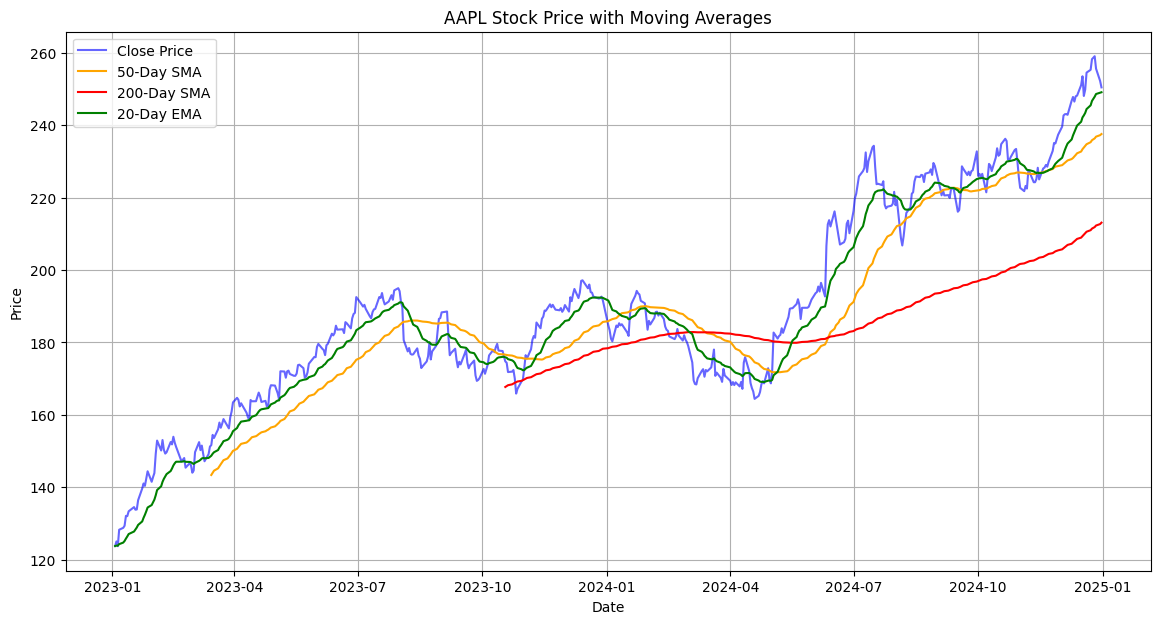

In [13]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical stock data (e.g., Apple Inc.)
stock = 'AAPL'
data = yf.download(stock, start='2023-01-01', end='2025-01-01')

# Calculate moving averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()  # 20-day Exponential Moving Average

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.6)
plt.plot(data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data['SMA_200'], label='200-Day SMA', color='red')
plt.plot(data['EMA_20'], label='20-Day EMA', color='green')

plt.title(f'{stock} Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
!pip install ccxt

   ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
   ------- -------------------------------- 1.0/5.7 MB 6.3 MB/s eta 0:00:01
   --------- ------------------------------ 1.3/5.7 MB 3.4 MB/s eta 0:00:02
   ------------------ --------------------- 2.6/5.7 MB 4.0 MB/s eta 0:00:01
   -------------------- ------------------- 2.9/5.7 MB 4.0 MB/s eta 0:00:01
   ------------------------- -------------- 3.7/5.7 MB 3.6 MB/s eta 0:00:01
   ----------------------------- ---------- 4.2/5.7 MB 3.6 MB/s eta 0:00:01
   -------------------------------------- - 5.5/5.7 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 5.7/5.7 MB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ------------- -------------------------- 1.0/3.2 MB 5.0 MB/s eta 0:00:01
   ---------------------- ----------------- 1.8/3.2 MB 4.4 MB/s eta 0:00:01
   -------------------------------- ------- 2.6/3.2 MB 4.2 MB/s eta 0:00:01
   -----------------------

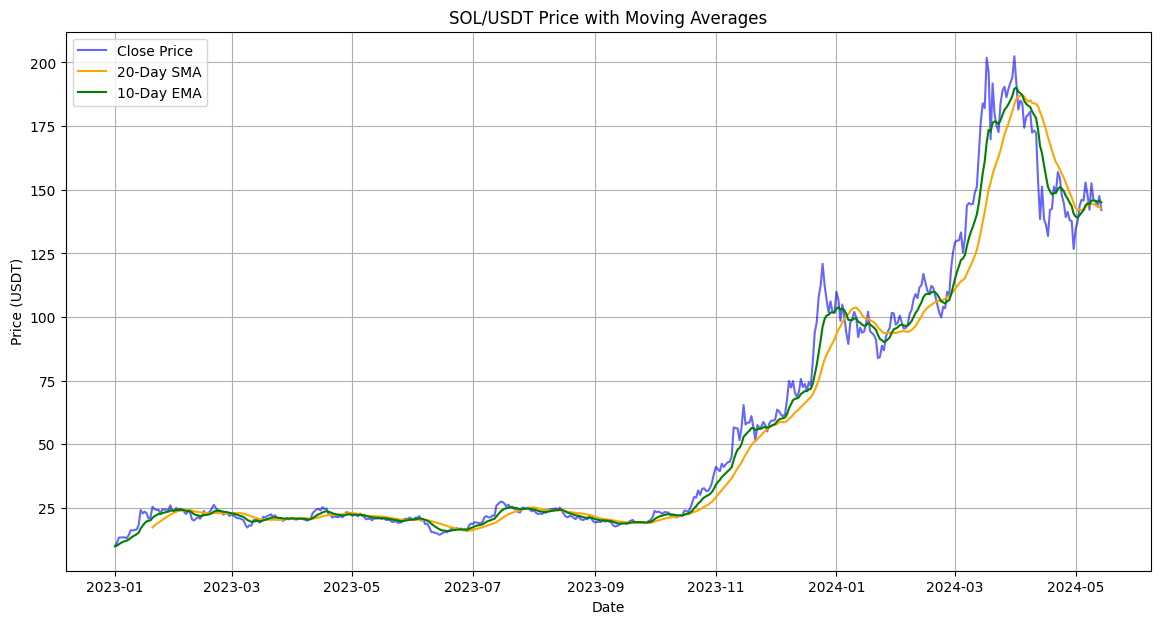

In [17]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt

# Connect to Binance
exchange = ccxt.binance()

# Fetch historical OHLCV data for Bitcoin/USDT (1-day timeframe)
symbol = 'SOL/USDT'
timeframe = '1d'
ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=exchange.parse8601('2023-01-01T00:00:00Z'))

# Convert data to a pandas DataFrame
data = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
data.set_index('timestamp', inplace=True)

# Calculate moving averages
data['SMA_20'] = data['close'].rolling(window=20).mean()
data['EMA_10'] = data['close'].ewm(span=10, adjust=False).mean()

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data['close'], label='Close Price', color='blue', alpha=0.6)
plt.plot(data['SMA_20'], label='20-Day SMA', color='orange')
plt.plot(data['EMA_10'], label='10-Day EMA', color='green')

plt.title(f'{symbol} Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [3]:
now = datetime.now() # todays date

ticker = 'AAPL'
start = datetime(now.year-10, now.month, now.day) # 10 years before (2014, jan, 16)
end = now
df = yf.download(ticker, start, end)
df


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-02-06,26.589567,26.884684,26.482251,26.833261,174826400
2015-02-09,26.766190,26.793017,26.477780,26.504609,155559200
2015-02-10,27.280403,27.309469,26.864559,26.866793,248034000
2015-02-11,27.919821,27.928764,27.387717,27.448081,294247200
2015-02-12,28.273071,28.501117,28.074091,28.183642,297898000
...,...,...,...,...,...
2025-01-30,237.589996,240.789993,237.210007,238.669998,55658300
2025-01-31,236.000000,247.190002,233.440002,247.190002,101075100


# 2. Data Exploration & Visualization

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(2515, 5)

In [6]:
df.describe()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,96.223887,97.162303,95.181148,96.136978,1.152362e+08
std,66.729455,67.346638,66.020976,66.656854,6.673978e+07
min,20.697262,21.001976,20.497942,20.619373,2.323470e+07
25%,35.966452,36.195959,35.734555,35.984926,7.036355e+07
50%,67.868629,68.756111,67.470916,67.815285,9.867070e+07
75%,152.726768,154.846249,150.935109,152.594178,1.401866e+08
max,259.019989,260.100006,257.630005,258.190002,6.488252e+08


In [7]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [8]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [9]:
df = df.reset_index()
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-02-06,26.589567,26.884684,26.482251,26.833261,174826400
1,2015-02-09,26.766190,26.793017,26.477780,26.504609,155559200
2,2015-02-10,27.280403,27.309469,26.864559,26.866793,248034000
3,2015-02-11,27.919821,27.928764,27.387717,27.448081,294247200
4,2015-02-12,28.273071,28.501117,28.074091,28.183642,297898000
...,...,...,...,...,...,...
2510,2025-01-30,237.589996,240.789993,237.210007,238.669998,55658300
2511,2025-01-31,236.000000,247.190002,233.440002,247.190002,101075100
2512,2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300


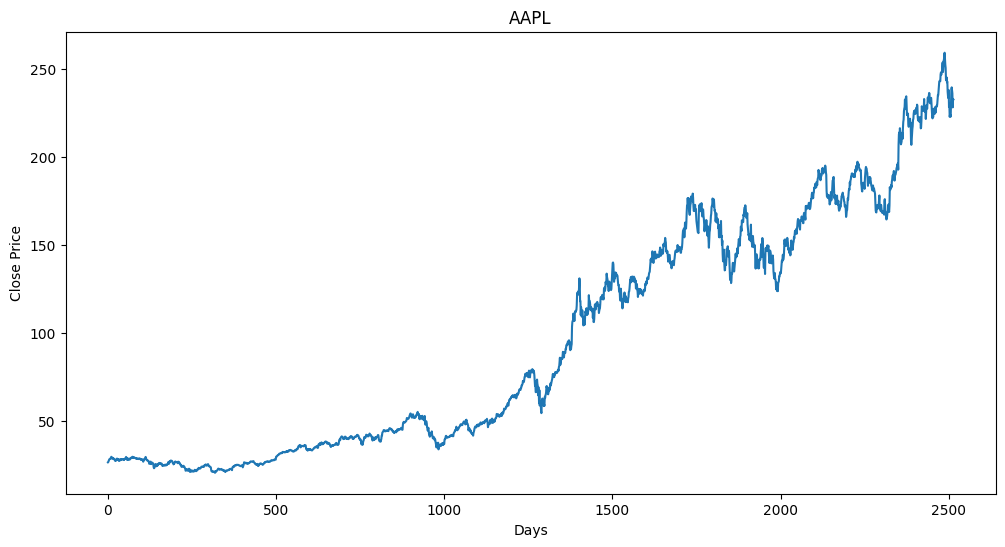

In [10]:
plt.figure(figsize=(12,6));
plt.plot(df.Close);
plt.title(ticker);
plt.xlabel('Days');
plt.ylabel('Close Price');


# 3. Feature Engineering

In [11]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90

# MA of 5 days ==> null, null, null, null, 30, 40

In [12]:
temp_df = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_df[:5])/5)

30.0


In [13]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [14]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### 100 days moving avarage

In [15]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head(103)





Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-02-06,26.589565,26.884682,26.482249,26.833259,174826400,NaN
1,2015-02-09,26.766190,26.793017,26.477780,26.504609,155559200,NaN
2,2015-02-10,27.280401,27.309467,26.864557,26.866791,248034000,NaN
3,2015-02-11,27.919819,27.928762,27.387715,27.448079,294247200,NaN
4,2015-02-12,28.273071,28.501117,28.074091,28.183642,297898000,NaN
...,...,...,...,...,...,...,...
98,2015-06-29,27.957867,28.393411,27.946642,28.166658,196645600,NaN
99,2015-06-30,28.159925,28.314836,28.031956,28.191356,177482800,28.524071
100,2015-07-01,28.422600,28.498933,28.285650,28.489953,120955200,28.542401


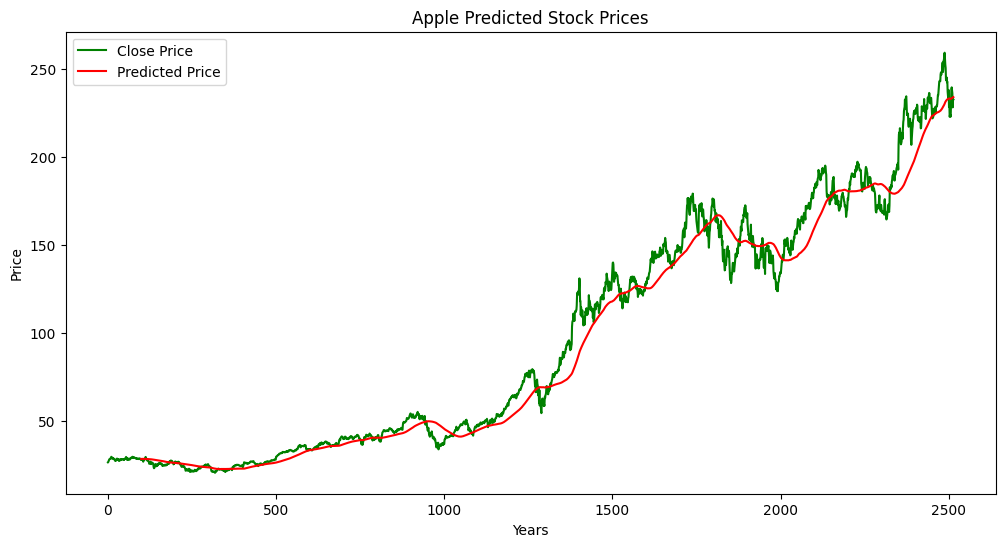

In [16]:
plt.figure(figsize=(12,6));
plt.plot(df.Close, 'g', label='Close Price');
plt.plot(df.MA_100, 'r', label='Predicted Price');
plt.legend();
plt.title('Apple Predicted Stock Prices');
plt.xlabel('Years');
plt.ylabel('Price');

### 200 days moving avarage

In [17]:
df['MA_200'] = df.Close.rolling(200).mean()

In [18]:
df

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-02-06,26.589565,26.884682,26.482249,26.833259,174826400,NaN,NaN
1,2015-02-09,26.766190,26.793017,26.477780,26.504609,155559200,NaN,NaN
2,2015-02-10,27.280401,27.309467,26.864557,26.866791,248034000,NaN,NaN
3,2015-02-11,27.919819,27.928762,27.387715,27.448079,294247200,NaN,NaN
4,2015-02-12,28.273071,28.501117,28.074091,28.183642,297898000,NaN,NaN
...,...,...,...,...,...,...,...,...
2510,2025-01-30,237.589996,240.789993,237.210007,238.669998,55658300,233.369493,219.091550
2511,2025-01-31,236.000000,247.190002,233.440002,247.190002,101075100,233.523720,219.411213
2512,2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300,233.597148,219.707416


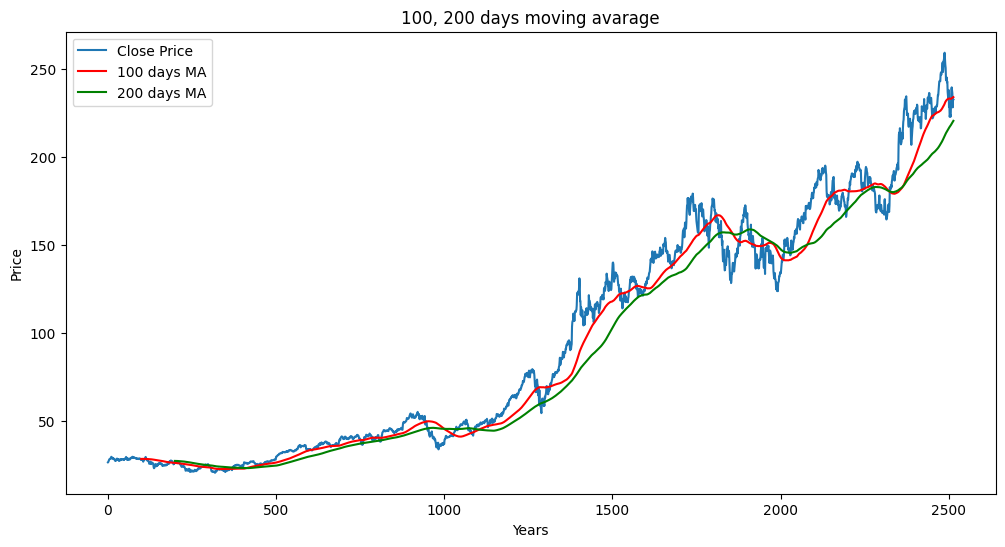

In [19]:
plt.figure(figsize=(12,6));
plt.plot(df.Close, label='Close Price');
plt.plot(df.MA_100, 'r', label='100 days MA');
plt.plot(df.MA_200, 'g', label='200 days MA');
plt.legend();
plt.title('100, 200 days moving avarage');
plt.xlabel('Years');
plt.ylabel('Price');

### Calculating percentage change between each treading session

In [20]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,26.589565,NaN
1,26.766190,0.006643
2,27.280401,0.019211
3,27.919819,0.023439
4,28.273071,0.012652
...,...,...
2510,237.589996,-0.007395
2511,236.000000,-0.006692
2512,228.009995,-0.033856


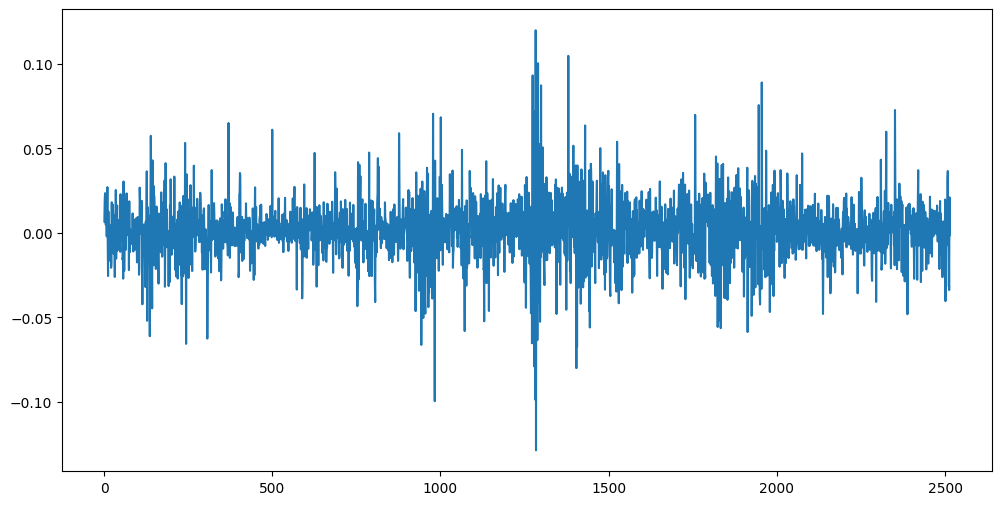

In [21]:
plt.figure(figsize=(12,6));
plt.plot(df['Percentage Changed']);

### 4. Data Preprocessing

In [22]:
df.shape

(2515, 9)

In [23]:
df

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200,Percentage Changed
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,,
0,2015-02-06,26.589565,26.884682,26.482249,26.833259,174826400,NaN,NaN,NaN
1,2015-02-09,26.766190,26.793017,26.477780,26.504609,155559200,NaN,NaN,0.006643
2,2015-02-10,27.280401,27.309467,26.864557,26.866791,248034000,NaN,NaN,0.019211
3,2015-02-11,27.919819,27.928762,27.387715,27.448079,294247200,NaN,NaN,0.023439
4,2015-02-12,28.273071,28.501117,28.074091,28.183642,297898000,NaN,NaN,0.012652
...,...,...,...,...,...,...,...,...,...
2510,2025-01-30,237.589996,240.789993,237.210007,238.669998,55658300,233.369493,219.091550,-0.007395
2511,2025-01-31,236.000000,247.190002,233.440002,247.190002,101075100,233.523720,219.411213,-0.006692
2512,2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300,233.597148,219.707416,-0.033856


In [24]:
# Spliting data into training and testing
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])

print(data_training)
print(data_testing)

Ticker        AAPL
0        26.589565
1        26.766190
2        27.280401
3        27.919819
4        28.273071
...            ...
1755    157.116318
1756    156.653885
1757    167.584824
1758    171.963104
1759    171.795853

[1760 rows x 1 columns]
Ticker        AAPL
1760    173.006027
1761    170.113419
1762    169.827728
1763    169.108597
1764    172.231461
...            ...
2510    237.589996
2511    236.000000
2512    228.009995
2513    232.800003
2514    232.470001

[755 rows x 1 columns]


In [25]:
data_training

Ticker,AAPL
0,26.589565
1,26.766190
2,27.280401
3,27.919819
4,28.273071
...,...
1755,157.116318
1756,156.653885
1757,167.584824
1758,171.963104


In [26]:
data_testing

Ticker,AAPL
1760,173.006027
1761,170.113419
1762,169.827728
1763,169.108597
1764,172.231461
...,...
2510,237.589996
2511,236.000000
2512,228.009995
2513,232.800003


In [27]:
# Scaling down data between 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [28]:
data_training_array = scaler.fit_transform(data_training)
data_training_array


array([[0.03720371],
       [0.03831891],
       [0.04156562],
       ...,
       [0.92744153],
       [0.9550858 ],
       [0.95402979]])

In [29]:
type(data_training_array)

numpy.ndarray

In [30]:
data_training_array.shape

(1760, 1)

### 5. Sequence Creation

In [31]:
# 10, 20, 15, 16, 20, 10, 30       25

In [32]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [33]:
x_train

array([[[0.03720371],
        [0.03831891],
        [0.04156562],
        ...,
        [0.04899004],
        [0.0458431 ],
        [0.04711889]],

       [[0.03831891],
        [0.04156562],
        [0.04560287],
        ...,
        [0.0458431 ],
        [0.04711889],
        [0.04877741]],

       [[0.04156562],
        [0.04560287],
        [0.04783329],
        ...,
        [0.04711889],
        [0.04877741],
        [0.04855063]],

       ...,

       [[0.84128883],
        [0.83148773],
        [0.82503668],
        ...,
        [0.86190303],
        [0.86134385],
        [0.85842407]],

       [[0.83148773],
        [0.82503668],
        [0.79340042],
        ...,
        [0.86134385],
        [0.85842407],
        [0.92744153]],

       [[0.82503668],
        [0.79340042],
        [0.79699836],
        ...,
        [0.85842407],
        [0.92744153],
        [0.9550858 ]]])

In [34]:
y_train

array([0.04877741, 0.04855063, 0.0479269 , ..., 0.92744153, 0.9550858 ,
       0.95402979])

In [35]:
x_train.ndim

3

In [36]:
y_train.ndim

1

In [37]:
x_train.shape

(1660, 100, 1)

In [38]:
y_train.shape

(1660,)

### 6. Model Building

In [39]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [40]:
# ML model 
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [41]:
model = Sequential()
model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

### 7. Model Training

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=2)

In [ ]:
model.summary()

In [ ]:
# save the trained model
model.save('stock_prediction_model.keras')

### 8. Preparing test data

In [ ]:
data_testing

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
past_100_days

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

In [ ]:
input_data = scaler.fit_transform(final_df)

In [ ]:
input_data


In [ ]:
input_data.shape

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test[0].shape

### 9. Making Prediction

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
y_predicted

In [ ]:
y_test

In [ ]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [ ]:
y_predicted

In [ ]:
y_test

In [ ]:
plt.figure(figsize=(12, 6));
plt.plot(y_test, 'b', label='Original price');
plt.plot(y_predicted, 'r', label='Predicted price');
plt.xlabel('Days');
plt.ylabel('Price');
plt.legend();


In [ ]:
plt.figure(figsize=(12, 6));
plt.plot(y_test, 'b', label='Original price');
plt.plot(y_predicted, 'r', label='Predicted price');
plt.xlabel('Days');
plt.ylabel('Price');
plt.legend();
plt.xlim(200, 500);
plt.ylim(120, 200);

### 10. Model Evalution

In [ ]:
#  Mean squared error
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
mse = mean_squared_error(y_test, y_predicted)
print(f'Mean Squared Error: {mse}')

In [ ]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

In [ ]:
# R-squared
r2 = r2_score(y_test, y_predicted)
print(f'R2-Squared: {r2}')